### Face Detection with OpenCV

In [2]:
import cv2

In [5]:
image_path=r'C:\Users\lunav\OneDrive\Desktop\prasad.jpeg'

# Read the image

In [6]:
image = cv2.imread(image_path)
print(image)

[[[176 186 180]
  [176 186 180]
  [176 186 180]
  ...
  [146 158 160]
  [148 157 160]
  [148 157 160]]

 [[176 186 180]
  [176 186 180]
  [176 186 180]
  ...
  [146 158 160]
  [148 157 160]
  [148 157 160]]

 [[176 186 180]
  [176 186 180]
  [176 186 180]
  ...
  [146 158 160]
  [148 157 160]
  [148 157 160]]

 ...

 [[245 246 244]
  [245 246 244]
  [245 246 244]
  ...
  [218 217 226]
  [217 217 223]
  [217 217 223]]

 [[245 246 244]
  [245 246 244]
  [245 246 244]
  ...
  [218 217 226]
  [217 217 223]
  [217 217 223]]

 [[245 246 244]
  [245 246 244]
  [245 246 244]
  ...
  [218 217 226]
  [217 217 223]
  [217 217 223]]]


In [7]:
image.shape

(1152, 648, 3)

In [8]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [6]:
gray_image.shape

(1152, 648)

In [7]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

In [8]:
face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

In [9]:
for (x, y, w, h) in face:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 4)

In [10]:
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

(-0.5, 647.5, 1151.5, -0.5)

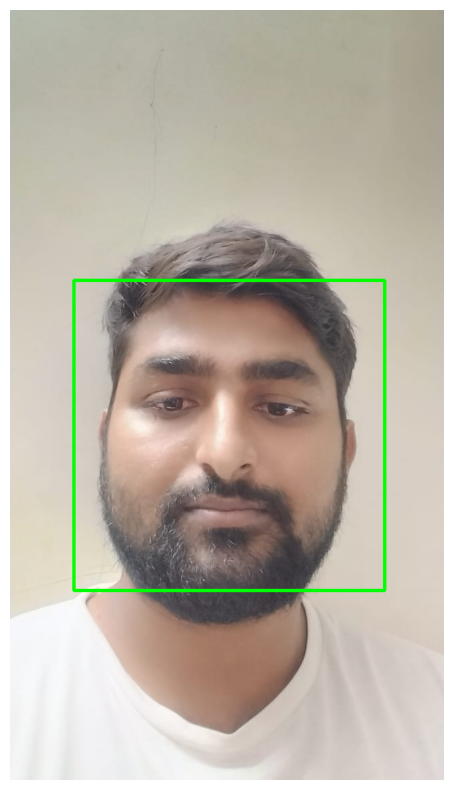

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')

In [15]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

### Step 2: Access the Webcam

In [14]:
video_capture = cv2.VideoCapture(0)

### Step 3: Identifying Faces in the Video Stream

In [16]:
def detect_bounding_box(vid):
    gray_image = cv2.cvtColor(vid, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray_image, 1.1, 5, minSize=(40, 40))
    for (x, y, w, h) in faces:
        cv2.rectangle(vid, (x, y), (x + w, y + h), (0, 255, 0), 4)
    return faces

### Step 4: Creating a Loop for Real-Time Face Detection

In [19]:
while True:

    result, video_frame = video_capture.read()  # read frames from the video
    if result is False:
        break  # terminate the loop if the frame is not read successfully

    faces = detect_bounding_box(
        video_frame
    )  # apply the function we created to the video frame

    cv2.imshow(
        "My Face Detection Project", video_frame
    )  # display the processed frame in a window named "My Face Detection Project"

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

video_capture.release()
cv2.destroyAllWindows()